In [17]:
import graph_tool as gt
from graph_tool import *
import graph_tool.draw as gtd

In [28]:
def read_large_file(file_object):
    while True:
        data = file_object.readline()
        if not data:
            break
        yield data.rstrip('\n')
        
def process_edge_line(line):
    source, target, prop = line.split(',')
    prop = [int(el) for el in prop.split(';')]
    return source, target, prop

def add_vertex(g, user_encoding):
    v = g.add_vertex()
    g.vertex_properties["encoding"][v] = user_encoding
    return v

def add_edge(g, source, target, periods_list):
    e = g.add_edge(source, target)
    g.edge_properties["periods"][e] = periods_list

In [39]:
g = Graph(directed=False)

# Create vertex property for the username encoding
vertex_property = g.new_vertex_property("int")
g.vertex_properties["encoding"] = vertex_property

# Create edge property for the list of periods
edge_property = g.new_edge_property("vector<short>")
g.edge_properties["periods"] = edge_property
g.list_properties()

encoding       (vertex)  (type: int32_t)
periods        (edge)    (type: vector<int16_t>)


In [40]:
with open("sample_edges.csv") as f:
    for line in read_large_file(f):
        source, target, prop = process_line(line)
        add_edge(g, source, target, prop)

In [41]:
[v for v in g.vertices()]

[<Vertex object with index '0' at 0x7fea73c8c990>,
 <Vertex object with index '1' at 0x7fea73c8c9f0>,
 <Vertex object with index '2' at 0x7fea73c8c930>,
 <Vertex object with index '3' at 0x7fea73c8ca50>,
 <Vertex object with index '4' at 0x7fea73c8c870>]

In [42]:
g.get_edges()

array([[1, 2, 0],
       [2, 3, 1],
       [3, 4, 2]], dtype=uint64)

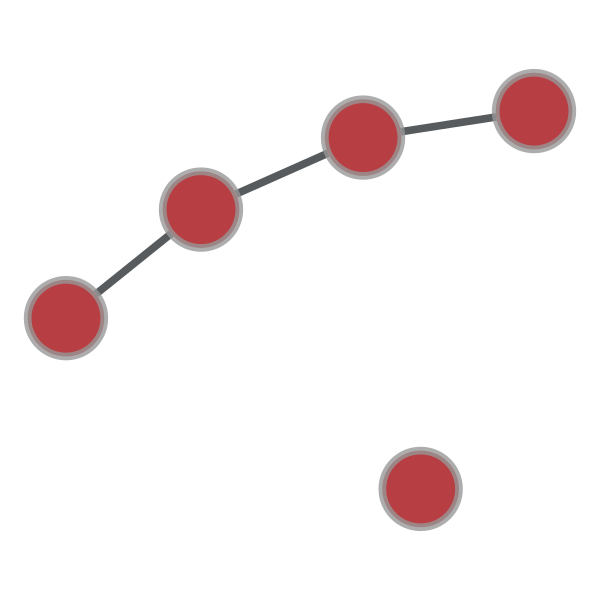

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7fea873d5fd0, at 0x7fea86a03ef0>

In [18]:
gtd.graph_draw(g)